In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score

# 1. Load the cleaned CSV
df = pd.read_csv('/content/drive/MyDrive/IIScAssignment/Classification_train.csv')

# 2. Drop date/time if still present
df = df.drop(columns=['Date', 'Time'], errors='ignore')  # 'errors="ignore"' avoids crashing if not present

# 3. Split features and label
X = df.drop('Label', axis=1)
y = df['Label']

# 4. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 6. Train MLP Classifier
mlp = MLPClassifier(hidden_layer_sizes=(100, 50), activation='relu', random_state=42, max_iter=500)
mlp.fit(X_train_scaled, y_train)

# 7. Evaluate
y_pred = mlp.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.4f}')
print('\nClassification Report:')
print(classification_report(y_test, y_pred))


Accuracy: 0.9876

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1243
           1       0.94      0.94      0.94       159
           3       1.00      0.97      0.98       129

    accuracy                           0.99      1531
   macro avg       0.98      0.97      0.97      1531
weighted avg       0.99      0.99      0.99      1531




🔁 Training MLP with layers: (64,)
Accuracy: 0.9876
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1243
           1       0.95      0.93      0.94       159
           3       1.00      0.97      0.98       129

    accuracy                           0.99      1531
   macro avg       0.98      0.97      0.97      1531
weighted avg       0.99      0.99      0.99      1531


🔁 Training MLP with layers: (64, 32)
Accuracy: 0.9909
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1243
           1       0.97      0.94      0.96       159
           3       1.00      0.99      1.00       129

    accuracy                           0.99      1531
   macro avg       0.99      0.98      0.98      1531
weighted avg       0.99      0.99      0.99      1531


🔁 Training MLP with layers: (64, 32, 16)
Accuracy: 0.9909
Classification Report:
   

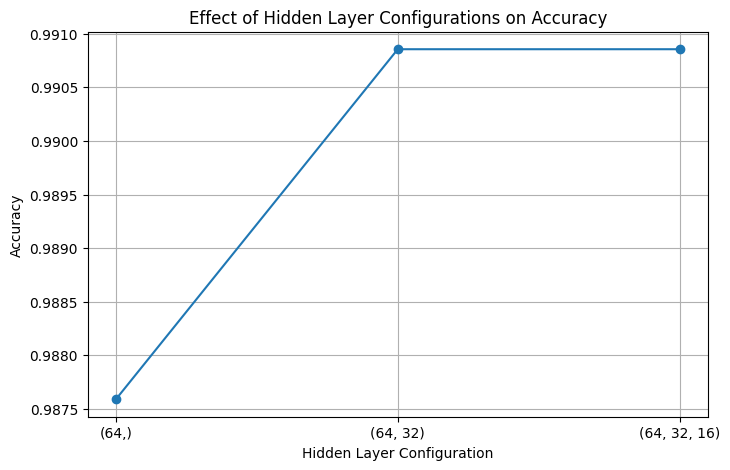

In [ ]:
import matplotlib.pyplot as plt


# Hidden layer configurations to test

layer_configs = [
    (64,),         # 1 hidden layer
    (64, 32),      # 2 hidden layers
    (64, 32, 16),  # 3 hidden layers
]

results = []

for config in layer_configs:
    print(f"\n🔁 Training MLP with layers: {config}")
    mlp = MLPClassifier(hidden_layer_sizes=config, activation='relu', max_iter=500, random_state=42)
    mlp.fit(X_train_scaled, y_train)

    y_pred = mlp.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)

    print(f"Accuracy: {acc:.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    results.append({
        "layers": config,
        "accuracy": acc
    })

# Plotting results
configs = [str(r['layers']) for r in results]
accuracies = [r['accuracy'] for r in results]
plt.figure(figsize=(8, 5))
plt.plot(configs, accuracies, marker='o')
plt.title('Effect of Hidden Layer Configurations on Accuracy')
plt.xlabel('Hidden Layer Configuration')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

In [ ]:
#experiment 2

# Define different neuron settings (3 layers)
neuron_configs = [
    (128, 64, 32),
    (64, 32, 16),
    (256, 128, 64),
    (32, 16, 8),
    (100, 100, 100)  # uniform neuron distribution
]

# Run experiments
for config in neuron_configs:
    print(f'\n🔁 Training MLP with neurons per layer: {config}')
    mlp = MLPClassifier(hidden_layer_sizes=config, activation='relu', max_iter=500, random_state=42)
    mlp.fit(X_train_scaled, y_train)
    y_pred = mlp.predict(X_test_scaled)

    acc = accuracy_score(y_test, y_pred)
    print(f'Accuracy: {acc:.4f}')
    print('Classification Report:')
    print(classification_report(y_test, y_pred))


🔁 Training MLP with neurons per layer: (128, 64, 32)
Accuracy: 0.9895
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1243
           1       0.97      0.94      0.95       159
           3       0.99      0.98      0.99       129

    accuracy                           0.99      1531
   macro avg       0.98      0.97      0.98      1531
weighted avg       0.99      0.99      0.99      1531


🔁 Training MLP with neurons per layer: (64, 32, 16)
Accuracy: 0.9909
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1243
           1       0.97      0.94      0.96       159
           3       1.00      1.00      1.00       129

    accuracy                           0.99      1531
   macro avg       0.99      0.98      0.98      1531
weighted avg       0.99      0.99      0.99      1531


🔁 Training MLP with neurons per layer: (256, 128, 

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score

# Activation functions to test
activation_functions = ['relu', 'tanh', 'logistic']

# Reuse previous X_train_scaled, X_test_scaled, y_train, y_test

for act_func in activation_functions:
    print(f'\n🔁 Training MLP with activation function: {act_func}')
    mlp = MLPClassifier(hidden_layer_sizes=(64, 32, 16), activation=act_func, max_iter=500, random_state=42)
    mlp.fit(X_train_scaled, y_train)
    y_pred = mlp.predict(X_test_scaled)

    acc = accuracy_score(y_test, y_pred)
    print(f'Accuracy: {acc:.4f}')
    print('Classification Report:')
    print(classification_report(y_test, y_pred))


🔁 Training MLP with activation function: relu
Accuracy: 0.9909
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1243
           1       0.97      0.94      0.96       159
           3       1.00      1.00      1.00       129

    accuracy                           0.99      1531
   macro avg       0.99      0.98      0.98      1531
weighted avg       0.99      0.99      0.99      1531


🔁 Training MLP with activation function: tanh
Accuracy: 0.9869
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1243
           1       0.96      0.92      0.94       159
           3       0.99      0.97      0.98       129

    accuracy                           0.99      1531
   macro avg       0.98      0.96      0.97      1531
weighted avg       0.99      0.99      0.99      1531


🔁 Training MLP with activation function: logistic
Accuracy: 0.9